In [113]:
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy
from build_solver import build_erg_time_opt_solver
import pickle as pkl


In [165]:
def get_sol_from_init(x, args, step_size=1e-3, c=1.0, max_iter=20000):
    u = np.zeros((args['N'], 2))
    init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}
    solver = build_erg_time_opt_solver(deepcopy(init_sol), args, step_size=1e-3, c=c)
    solver.solve(args=args, max_iter=max_iter, eps=1e-18)
    sol = solver.get_solution()
    return init_sol, sol

def plot_traj(_axs, sol):
    init_sol, final_sol = sol

    _axs[1].set_title('t_f = {:4.2f}'.format(final_sol['tf']))
    _axs[1].plot(final_sol['x'][:,0], final_sol['x'][:,1],'g.')
    _axs[1].plot(final_sol['x'][:,0], final_sol['x'][:,1])

    _axs[0].plot(init_sol['x'][:,0], init_sol['x'][:,1], 'g.')
    # _axs[0].plot(init_sol['x'][:,0], init_sol['x'][:,1])

    for _ax in _axs:
        _ax.set_aspect('equal', 'box')
        _ax.set_xlim(0,1)
        _ax.set_ylim(0,1)
        _ax.set_yticks([0, 0.5, 1])
        _ax.set_xticks([0, 0.5, 1])

In [161]:
np.random.seed(42)

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.01,
    # 'alpha' : 0.8,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
x[:,:2] = x[:,:2] + np.random.normal(0,0.02,size=(args['N'],2))
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}

rand_norm_sol = get_sol_from_init(x, args, step_size=1e-3, c=0.8)

x = np.random.uniform(0,1,size=(args['N'], 2))
x = np.concatenate([x, np.zeros((args['N'],2))], axis=1)
x[0] = args['x0'].copy()
x[-1] = args['xf'].copy()

rand_unif_sol = get_sol_from_init(x, args, step_size=1e-3, c=0.8)

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)

lerp_sol = get_sol_from_init(x, args, step_size=1e-3, c=1.0)

x1 = np.linspace(0, 1, num=args['N']).reshape((-1,1))
x2 = -0.5*np.cos(10*x1) + 0.5
x = np.concatenate([x1, x2, np.zeros((args['N'],2))], axis=1)
x[0] = args['x0'].copy()
x[-1] = args['xf'].copy()

sine_sol = get_sol_from_init(x, args, step_size=1e-3, c=1.0)




done in  6110  iterations
done in  6667  iterations
done in  4751  iterations
done in  5147  iterations


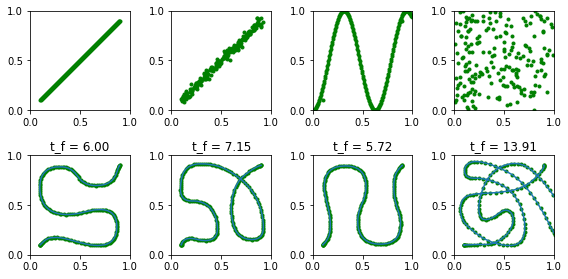

In [168]:
fig, axs = plt.subplots(2, 4, figsize=(8,4))

plot_traj(axs[:,0], lerp_sol)

plot_traj(axs[:,1], rand_norm_sol)

plot_traj(axs[:,2], sine_sol)

plot_traj(axs[:,3], rand_unif_sol)

fig.tight_layout()
plt.savefig('initial_cond_variability.pdf')

done in  7609  iterations
13.4297285


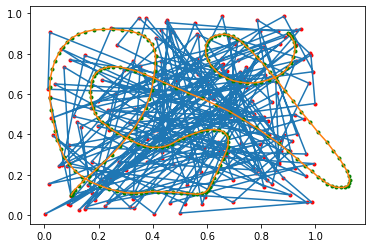

In [53]:

x = np.random.uniform(0,1,size=(args['N'], 2))
x = np.concatenate([x, np.zeros((args['N'],2))], axis=1)
x[0] = args['x0'].copy()
x[-1] = args['xf'].copy()
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1],'r.')
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1])

solver = build_erg_time_opt_solver(init_sol, args, step_size=1e-3, c=.8)

# solver.reset()
# solver = build_erg_time_opt_solver(init_sol, args)
solver.solve(args=args, max_iter=20000, eps=1e-10)
sol = solver.get_solution()
init_sol = deepcopy(sol)
plt.plot(sol['x'][:,0], sol['x'][:,1],'g.')
plt.plot(sol['x'][:,0], sol['x'][:,1])
print(sol['tf'])

# plt.show()

done in  4751  iterations
6.0018616


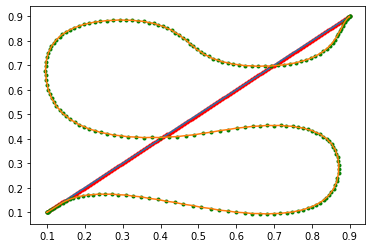

In [59]:
args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.01,
    # 'alpha' : 0.8,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1],'r.')
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1])

solver = build_erg_time_opt_solver(init_sol, args, step_size=1e-3, c=1.0)
# solver.reset()
# solver = build_erg_time_opt_solver(init_sol, args)
solver.solve(args=args, max_iter=20000, eps=1e-10)
sol = solver.get_solution()
init_sol = deepcopy(sol)
plt.plot(sol['x'][:,0], sol['x'][:,1],'g.')
plt.plot(sol['x'][:,0], sol['x'][:,1])
print(sol['tf'])

done in  5147  iterations
5.7208977


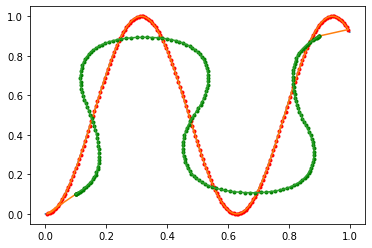

In [54]:
x1 = np.linspace(0, 1, num=args['N'])
x2 = -0.5*np.cos(10*x1) + 0.5
plt.plot(x1,x2)


args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.01,
    # 'alpha' : 0.8,
}

# x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
x1 = np.linspace(0, 1, num=args['N']).reshape((-1,1))
x2 = -0.5*np.cos(10*x1) + 0.5
x = np.concatenate([x1, x2, np.zeros((args['N'],2))], axis=1)
x[0] = args['x0'].copy()
x[-1] = args['xf'].copy()
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1],'r.')
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1])

solver = build_erg_time_opt_solver(init_sol, args, step_size=1e-3, c=1.)

# solver.reset()
# solver = build_erg_time_opt_solver(init_sol, args)
solver.solve(args=args, max_iter=20000, eps=1e-10)
sol = solver.get_solution()
init_sol = deepcopy(sol)
plt.plot(sol['x'][:,0], sol['x'][:,1],'g.')
plt.plot(sol['x'][:,0], sol['x'][:,1])
print(sol['tf'])

unsuccessful, tol:  553.28125
8.681931


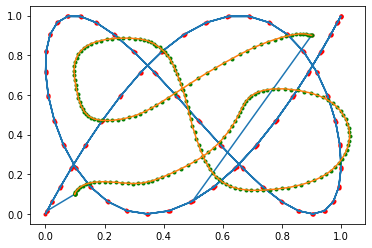

In [51]:

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.01,
    # 'alpha' : 0.8,
}

# x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
_t = np.linspace(0, 1, num=args['N']).reshape((-1,1))
x1 = -0.5*np.cos(30*_t) + 0.5
x2 = -0.5*np.cos(50*_t) + 0.5
x = np.concatenate([x1, x2, np.zeros((args['N'],2))], axis=1)
x[0] = args['x0'].copy()
x[-1] = args['xf'].copy()
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1],'r.')
plt.plot(init_sol['x'][:,0], init_sol['x'][:,1])

solver = build_erg_time_opt_solver(init_sol, args, step_size=1e-3, c=1.)

# solver.reset()
# solver = build_erg_time_opt_solver(init_sol, args)
solver.solve(args=args, max_iter=20000, eps=1e-10)
sol = solver.get_solution()
init_sol = deepcopy(sol)
plt.plot(sol['x'][:,0], sol['x'][:,1],'g.')
plt.plot(sol['x'][:,0], sol['x'][:,1])
print(sol['tf'])